## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [1]:
# ! git clone https://github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 34 (delta 7), reused 18 (delta 1), pack-reused 5
Receiving objects: 100% (34/34), 10.92 MiB | 14.23 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
> There are no NAs to handle.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
dfcars = pd.read_csv("/content/knn/data/USA_cars_datasets.csv")
dfcars.head()
# keep variables of price, year, mileage only
df = dfcars[['price', 'year', 'mileage']]

df.head()
df.shape

# check for NAs
nan_df = df.isna()
print(nan_df)

      price   year  mileage
0     False  False    False
1     False  False    False
2     False  False    False
3     False  False    False
4     False  False    False
...     ...    ...      ...
2494  False  False    False
2495  False  False    False
2496  False  False    False
2497  False  False    False
2498  False  False    False

[2499 rows x 3 columns]


2. Maxmin normalize `year` and `mileage`.


In [10]:
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
df = df.apply(maxmin)
print(df.head())
print(df.describe()) # check that min and max are 0 and 1 respectively

      price      year   mileage
0  0.074205  0.744681  0.269287
1  0.034146  0.808511  0.187194
2  0.063015  0.957447  0.038892
3  0.294464  0.872340  0.063016
4  0.326266  0.957447  0.006537
             price         year      mileage
count  2499.000000  2499.000000  2499.000000
mean      0.221056     0.930091     0.051377
std       0.142710     0.073248     0.058654
min       0.000000     0.000000     0.000000
25%       0.120141     0.914894     0.021088
50%       0.199058     0.957447     0.034742
75%       0.301007     0.978723     0.062354
max       1.000000     1.000000     1.000000


3. Split the sample into ~80% for training and ~20% for evaluation.


In [11]:
y = df['price'] # Create target variable vector
X = df.loc[:,['year','mileage']] # Create feature matrix

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
> For a k ranging from 0 to 100, the mean squared error decreases except over 100 which it increases.


In [36]:
from sklearn.neighbors import KNeighborsRegressor # Import the kNN regression tool

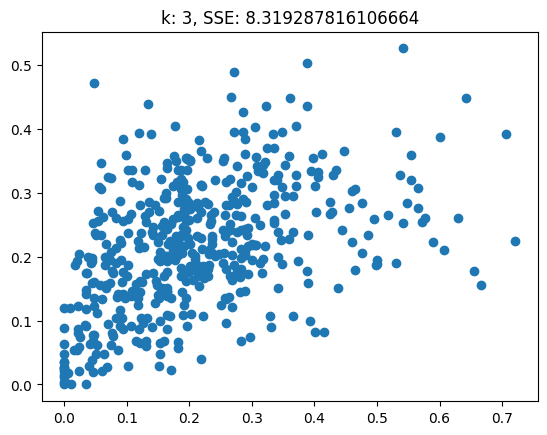

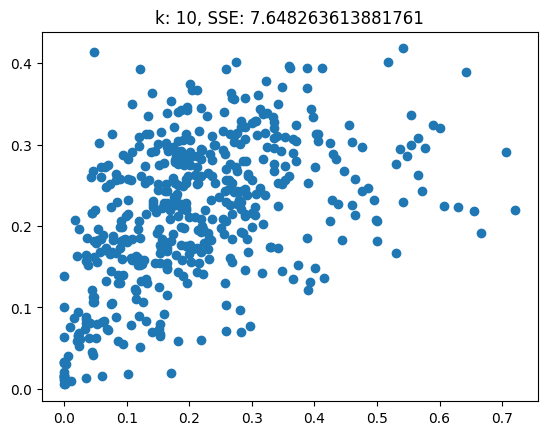

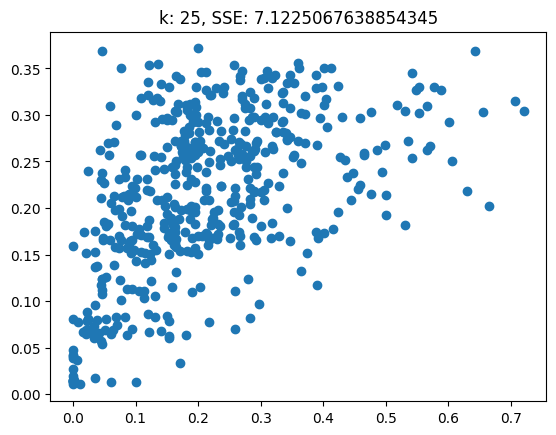

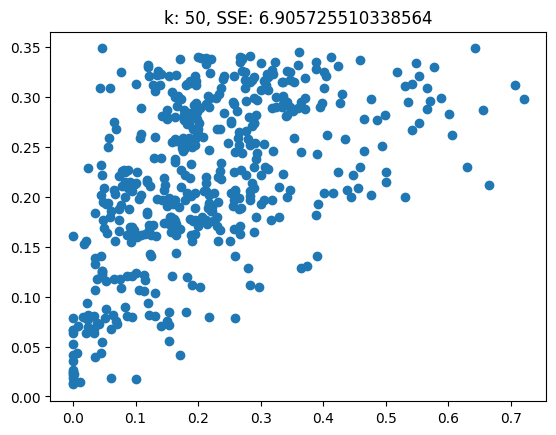

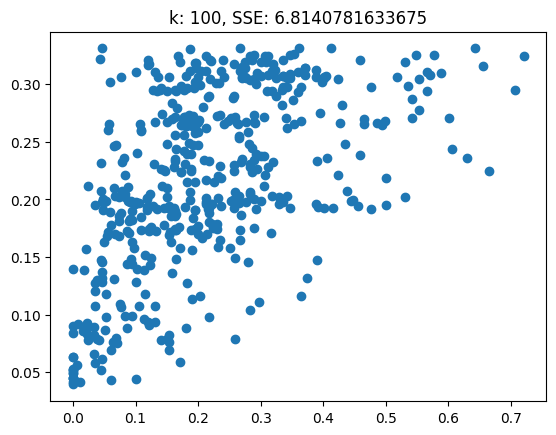

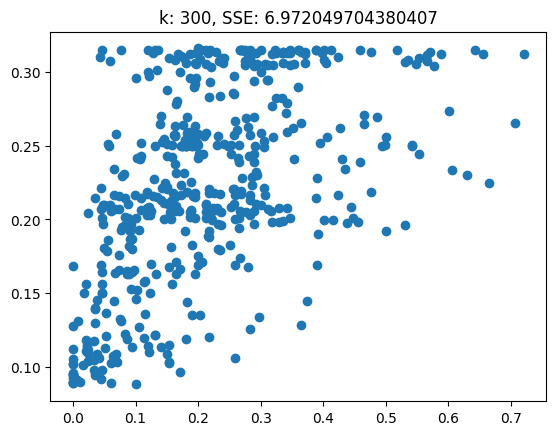

[1]


<ipython-input-50-e0839a7adef2>:18: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum


In [50]:
k_bar = 6 # Number of k's to try
SSE = np.zeros(k_bar) # We'll store the SSE here
SSE_on_train = np.zeros(k_bar) # For pedogogical purposes, we'll save the training error

for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set

    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    plt.show()

5. Determine the optimal $k$ for these data.
> The optimal k for this data is 77.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 5 into account. (Hint: Use the words "underfitting" and "overfitting".)
> For k values a lot less than 77 (like 3,10,25) , the data was overfit, so the plot was too complex and showed lots of variations in the predicted price for high year and low mileage that were not realistic. For k values much greater than 77 (like 300), the data was underfit and the plot showed not enough variation and was too simple to explain any phenomena. For k values close to 77, like 50 and 100, the data was alright and relatively close to the optimal plot.

[77]


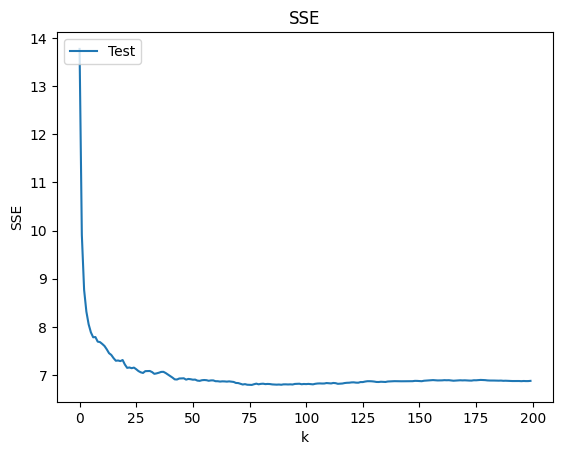

In [56]:
k_bar = 200 # Number of k's to try
SSE = np.zeros(k_bar) # We'll store the SSE here
SSE_on_train = np.zeros(k_bar) # For pedogogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper left')
plt.title('SSE')
plt.show()

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)